#  학습데이터처리 기말고사 2022.07.07
---

In [1]:
import os
import pandas as pd
import seaborn as sns

path = "../dataset/FinalExam"

# ▶ Poketmon.csv 파일 사용 (1, 2번 문제)

In [2]:
poketmon = pd.read_csv(os.path.join(path, "Pokemon.csv"), index_col=0)
poketmon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
poketmon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


## 1. Attack 컬럼의 값을 기준으로 내림차순정렬 했을 때 상위 400위까지 포켓몬들과 401~800위까지의 포켓몬들에서 전설포켓몬(Legendary 컬럼)의 숫자 차이를 구하시오

In [4]:
# Attack 컬럼 값을 기준으로 내림차순 정렬
sort_attack = poketmon.sort_values(by="Attack", ascending=False)

In [5]:
# 조건에 맞는 순위별 포켓몬 중 Legendary가 True인 개수 카운트
top400 = sort_attack[:400].Legendary.value_counts()[True]
sub400 = sort_attack[400:800].Legendary.value_counts()[True]

In [6]:
# 전설 포켓몬 숫자 차이
gap = abs(top400 - sub400)
gap

57

## 2. Type 1 컬럼의 속성이 Fire인 포켓몬들의 Attack의 평균이상인 Water 속성의 포켓몬 수를 구하시오.

In [7]:
# Type1 컬럼의 속성이 Fire인 포켓몬들의 Attack 평균 구하기
fire_mean = poketmon[poketmon["Type 1"]=="Fire"].Attack.mean()
fire_mean

84.76923076923077

In [8]:
# fire_mean 이상인 Water 속성 포켓몬 수 구하기
water_cnt = len(poketmon[(poketmon["Type 1"]=="Water") & (poketmon["Attack"] >= fire_mean)])
water_cnt

37

---
# ▶ bank.csv 파일 사용 (3~9번 문제)
: 포르투갈 은행 기관의 직접 마케팅 캠페인(전화 통화)와 관련된 데이터

In [9]:
bank = pd.read_csv(os.path.join(path, "bank.csv"), sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## 3. 마케팅 응답 고객들의 나이를 10살 단위로 변환했을 때, 가장 많은 인원을 가진 "나이대와 인원수"를 도출하시오
10살 단위 변환 예 : ```(0-9 -> 0, 10-19 -> 10, 20-29 -> 20)```

In [11]:
# 나이를 10살 단위로 변환하기
bank["age_category"] = bank["age"].apply(lambda x: (x//10)*10)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,30
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,30
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,30
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,30
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,50


In [12]:
# 나이대별로 인원수 도출하기
age_cnt = bank["age_category"].value_counts()
age_cnt

30    1808
40    1203
50     854
20     478
60     113
70      47
80      14
10       4
Name: age_category, dtype: int64

In [13]:
# 가장 큰 값 반환  : pandas.Series.nlargest()
age_cnt.nlargest(1)

30    1808
Name: age_category, dtype: int64

## 4. 나이가 25살 이상 29살 미만인 응답 고객들 중 housing 컬럼의 값이 yes인 고객의 수는 몇 명인가?

In [14]:
len(bank[(bank["age"] >= 25) & (bank["age"] < 29) & (bank["housing"]=="yes")])

187

## 5. numeric한 값을 가지지 않은 컬럼들 중 unique한 값을 가장 많이 가지는 컬럼의 이름과 unique한 값의 개수는 몇 개인지를 구하시오

In [15]:
# 숫자형이 아닌 컬럼들 가지고 오기
nonnumeric = bank.select_dtypes(exclude="number")

In [16]:
# 각 컬럼별 unique한 값의 개수 파악하기
nonnumeric.nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [17]:
nonnumeric["job"].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [18]:
nonnumeric["month"].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [19]:
# 가장 큰 값 반환
nonnumeric.nunique().nlargest(3)

job          12
month        12
education     4
dtype: int64

## 6. balance 컬럼 값들의 평균값 이상을 가지는 데이터를 ID 값을 기준으로 내림차순 정렬했을 때, 상위 100개 데이터의 balance 값의 평균은 얼마인가?

In [20]:
# balance 컬럼 값들의 평균값 구하기
bal_mean = bank["balance"].mean()
bal_mean

1422.6578190665782

In [21]:
# bal_mean 값 이상을 가지는 데이터를 ID 값을 기준으로 내림차순 정렬
sort_ID = bank[bank["balance"] >= bal_mean].sort_index(ascending=False)

In [22]:
# sort_ID 상위 100개 데이터의 balance 값의 평균
sort_ID_top100 = sort_ID[:100].balance.mean()
sort_ID_top100

4726.76

## 7. 가장 많이 마케팅(전화)을 집행했던 날짜는 언제인가? (데이터 그대로 일(숫자), 달(영문)으로 표기)

In [23]:
bank["contact"].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [24]:
# 마케팅 전화 집행만 추출하기
# tel_df = bank[bank["contact"]=="telephone"]
tel_df = bank[bank["contact"]!="unknown"]

In [25]:
# 날짜별 데이터프레임 생성
date_df = tel_df.groupby(["day", "month"])
date_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,30
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,30
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,30
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,30
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,45,management,single,tertiary,no,2048,yes,no,cellular,18,oct,310,1,804,1,failure,yes,40
4458,29,management,single,tertiary,no,572,no,no,cellular,16,dec,314,1,195,1,success,yes,20
4465,38,management,single,tertiary,no,623,no,no,cellular,28,jun,297,4,144,4,other,yes,30
4476,42,management,married,tertiary,no,603,yes,no,cellular,5,nov,298,5,-1,0,unknown,no,40


In [26]:
date_df["contact"].count().nlargest(3)

day  month
19   nov      84
18   nov      72
21   nov      71
Name: contact, dtype: int64

## 8. age와 balance 컬럼 간의 상관계수를 구하고, heatmap 그래프로 표현하시오

In [27]:
# age와 balance 컬럼 간의 상관계수를 구하기
corr_age_bal = bank[["age", "balance"]].corr()
corr_age_bal

,age,balance
age,1.00000,0.08382
balance,0.08382,1.00000


## 9. age와  balance 컬럼 간의 상관 계수를 구하고, heatmap 그래프로 표현하시오

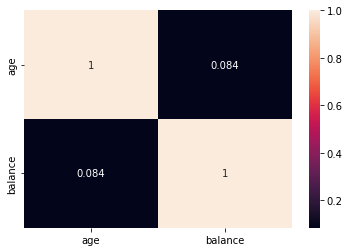

In [28]:
# heatmap 그래프로 표현하기
sns.heatmap(corr_age_bal,
           annot=True  # 실제값 표시
           )

# ▶ stroke.csv 파일 사용 (10~12번 문제) 

In [29]:
stroke = pd.read_csv(os.path.join(path, "healthcare-dataset-stroke-data.csv"))
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 10. 성별이 Male인 환자들의 age의 평균값(소수점 3자리까지, 반올림)을 구하시오.

In [31]:
male_mean = stroke[stroke["gender"]=="Male"].age.mean()
round(male_mean, 3)

42.483

## 11. bmi 컬럼의 결측치를 bmi 컬럼의 결측치를 제외한 나머지 값들의 평균값으로 채웠을 경우, bmi 컬럼의 평균을 소수점 이하 3자리까지 구하시오

In [32]:
# 결측치를 제외한 나머지 값들의 평균값으로 채우기
stroke_avg = stroke.copy()
stroke_avg_fillna = stroke_avg["bmi"].fillna(stroke_avg["bmi"].mean())
stroke_avg_mean = stroke_avg_fillna.mean()

round(stroke_avg_mean, 3)

28.893

## 12. bmi 컬럼의 각 결측치들을 결측치를 가진 환자 나이대(10 단위)의 평균 bmi 값으로 대체한 후 대체된 bmi 컬럼의 평균을 소숫점 이하 3자리 (반올림)까지 구하시오
10살 단위 변환 예 : ```(0-9 -> 0, 10-19 -> 10, 20-29 -> 20)```

In [33]:
# 나이를 10살 단위로 변환하기
stroke["age_category"] = stroke["age"].apply(lambda x: (x//10)*10)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,70.0


In [34]:
# 나이대별 평균 bmi값 구하기
stroke.groupby(["age_category"]).bmi.mean()

age_category
0.0     18.869935
10.0    24.906598
20.0    28.136920
30.0    31.205864
40.0    31.446099
50.0    31.750435
60.0    31.004068
70.0    29.378168
80.0    28.281319
Name: bmi, dtype: float64

In [35]:
# 결측치 채워주기
fill_bmi = stroke.groupby(["age_category"]).apply(lambda x: x.fillna(x.mean()))
fill_bmi.head()

C:\Users\AI-00\AppData\Local\Temp/ipykernel_59988/1489812522.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fill_bmi = stroke.groupby(["age_category"]).apply(lambda x: x.fillna(x.mean()))


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,60.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.004068,never smoked,1,60.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,80.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,40.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,70.0


In [36]:
# 대체된 bmi 컬럼의 평균을 소숫점 이하 3자리 반올림하기
round(fill_bmi["bmi"].mean(), 3)

28.916